 # MOVIE RECOMMENDATION SYSTEM

## Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import difflib 
from sklearn.feature_extraction.text import TfidfVectorizer
#used to convert textual data into numerical value
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt 
import seaborn as sns  
sns.set_style('white') 

## Data Collection

In [31]:
moviesdata = pd.read_csv("./TMDB 5000 Movie Dataset.csv")

## Data Preprocessing

In [32]:
moviesdata.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [33]:
moviesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [34]:
moviesdata.shape

(4803, 24)

In [35]:
moviesdata.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

## Data Visualization

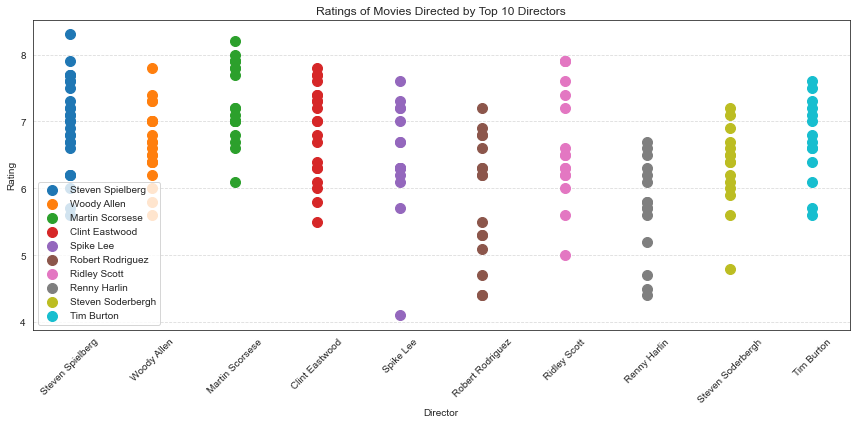

In [36]:
top_10_directors = moviesdata['director'].value_counts().head(10).index
filtered_df = moviesdata[moviesdata['director'].isin(top_10_directors)]
plt.figure(figsize=(12, 6))
for director in top_10_directors:
    director_data = filtered_df[filtered_df['director'] == director]
    plt.scatter([director] * len(director_data), director_data['vote_average'], label=director, marker='o', s=100)
plt.title('Ratings of Movies Directed by Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


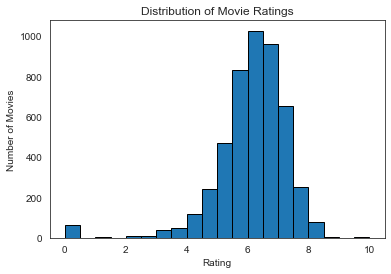

In [37]:
plt.hist(moviesdata['vote_average'], bins=20, edgecolor='k')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

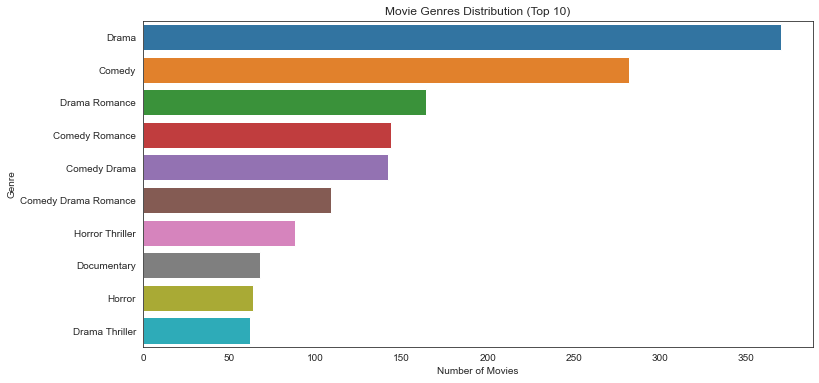

In [38]:
top_genres = genres.value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.countplot(y=genres, order=top_genres.index)
plt.title('Movie Genres Distribution (Top 10)')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

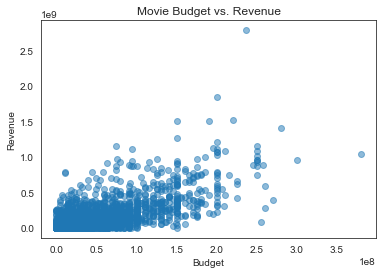

In [39]:
plt.scatter(moviesdata['budget'], moviesdata['revenue'], alpha=0.5)
plt.title('Movie Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

## Feature Extraction

In [44]:
#Selecting relevant features
movie_features = ['genres', 'keywords', 'tagline', 'cast', 'director']

In [45]:
print(movie_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [46]:
#replacing null values to null string
for feature in movie_features:
    moviesdata[feature] = moviesdata[feature].fillna('')

In [47]:
#combing the features
features_combination = moviesdata['genres']+' '+moviesdata['keywords']+' '+moviesdata['tagline']+' '+moviesdata['cast']+' '+moviesdata['director']

In [48]:
features_combination[0]

'Action Adventure Fantasy Science Fiction culture clash future space war space colony society Enter the World of Pandora. Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez James Cameron'

In [49]:
features_combination

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

## Features Vectorization

In [50]:
vectorizer = TfidfVectorizer()
#transforms data to numerical value or feature vectors
featurevector = vectorizer.fit_transform(features_combination)

In [51]:
print(featurevector)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

## Similarity Score

In [52]:
similarity_score = cosine_similarity(featurevector)

In [53]:
print(similarity_score)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [54]:
print(similarity_score.shape) #movie index, similarity score

(4803, 4803)


In [55]:
user_movie_name = input('Enter your favorite movie name: ')

Enter your favorite movie name: avat


In [59]:
#list of all movies in the dataset
titles_list = moviesdata['title'].tolist()
print(titles_list)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [60]:
#matching the movie name given by the user with the dataset
close_match = difflib.get_close_matches(user_movie_name,titles_list)
print(close_match)

['Cavite', 'Avatar', 'Ararat']


In [61]:
final_close_match = close_match[0]
print(final_close_match)

Cavite


In [62]:
# finding index of the movie with title
index_movie = moviesdata[moviesdata.title == final_close_match]['index'].values[0]
print(index_movie)

4797


In [63]:
#movie having same similarity score (similarity between user movie with other movie)
similarity = list(enumerate(similarity_score[index_movie]))
print(similarity)

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.013001635807198665), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.010344137960235044), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.01172386855522005), (26, 0.0), (27, 0.010607332334544032), (28, 0.011645599135222208), (29, 0.01218303073792768), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.011680332735237485), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.01121704353183688), (42, 0.0), (43, 0.011836221783647195), (44, 0.0), (45, 0.010563091692091667), (46, 0.0), (47, 0.0), (48, 0.0), (49, 0.0), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.013184068285956755), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.0), (65, 0.011873345007897652), (66, 0.0), (67, 0.0), (68, 0.0), (69, 0.0), (70, 0.0), (71, 0.0), (72, 0.0), (73, 

In [64]:
print(len(similarity))

4803


In [65]:
#recommending movies with higher similarity score values
similar_movies = sorted(similarity, key = lambda x:x[1], reverse = True) 
print(similar_movies)

[(4797, 1.0000000000000004), (2708, 0.11962662924875453), (3284, 0.11040136946282257), (4199, 0.10723346949679868), (1546, 0.09993287640693159), (222, 0.09735639837138906), (3340, 0.097158446124738), (1259, 0.09562508687097115), (1543, 0.09320331842046518), (4320, 0.08965797331045604), (2658, 0.08909134733918812), (4490, 0.08819462013749475), (334, 0.08783726451029111), (1999, 0.08659221567786933), (3134, 0.08509764076326977), (1678, 0.08487584225738903), (713, 0.08471551884079245), (2157, 0.08443483999266192), (3279, 0.08255200152104368), (2959, 0.07982983724378802), (3322, 0.07973045341869137), (3547, 0.07938177348134602), (770, 0.07769843535782964), (675, 0.07759858815754606), (3729, 0.07756197714862421), (4004, 0.07676903753380089), (3732, 0.07636876603696495), (4123, 0.07575705998633124), (1804, 0.07559053962966493), (3385, 0.07501033095291071), (3226, 0.07497723465151741), (375, 0.0741759264332777), (1554, 0.0740870297955039), (2248, 0.07296646205387672), (4448, 0.072883871834399

In [66]:
print('Movies recommended for you are : \n')
i = 1
for movie in similar_movies:
    index_movie = movie[0]
    movie_title = moviesdata[moviesdata.index == index_movie]['title'].values[0]
    if (i<25):
        print(i, '.',movie_title)
        i+=1

Movies recommended for you are : 

1 . Cavite
2 . Caravans
3 . Brooklyn Rules
4 . Yes
5 . The Hunt for Red October
6 . Elysium
7 . The Piano
8 . Memoirs of an Invisible Man
9 . The Vow
10 . Dead Man's Shoes
11 . Pandaemonium
12 . Starsuckers
13 . Jurassic Park III
14 . The Adventurer: The Curse of the Midas Box
15 . Partition
16 . United Passions
17 . The Horse Whisperer
18 . Daybreakers
19 . Prefontaine
20 . Machine Gun McCain
21 . Betty Fisher and Other Stories
22 . A Room for Romeo Brass
23 . Event Horizon
24 . Jurassic Park


In [67]:
def Movie_Recommendation_System():
    movie_features = ['genres', 'keywords', 'tagline', 'cast', 'director']

    # Replacing null values with an empty string
    for feature in movie_features:
        moviesdata[feature] = moviesdata[feature].fillna('')

    features_combination = moviesdata['genres'] + ' ' + moviesdata['keywords'] + ' ' + moviesdata['tagline'] + ' ' + moviesdata['cast'] + ' ' + moviesdata['director']
    vectorizer = TfidfVectorizer()
    featurevector = vectorizer.fit_transform(features_combination)

    similarity_score = cosine_similarity(featurevector)

    user_movie_name = input('Enter your favorite movie name: ')

    # List of all movies in the dataset
    titles_list = moviesdata['title'].tolist()
    close_match = difflib.get_close_matches(user_movie_name, titles_list)
    final_close_match = close_match[0]
    index_movie = moviesdata[moviesdata.title == final_close_match]['index'].values[0]

    similarity = list(enumerate(similarity_score[index_movie]))
    similar_movies = sorted(similarity, key=lambda x: x[1], reverse=True)

    print('Movies recommended for you are: \n')
    i = 1
    for movie in similar_movies:
        index_movie = movie[0]
        movie_title = moviesdata[moviesdata.index == index_movie]['title'].values[0]
        if i < 25:
            print(i, '.', movie_title)
            i += 1

Movie_Recommendation_System() 

Enter your favorite movie name: hulk
Movies recommended for you are: 

1 . Hulk
2 . The Helix... Loaded
3 . House of Sand and Fog
4 . Terminator Salvation
5 . Northfork
6 . Zodiac
7 . Star Trek
8 . Wolves
9 . Milk
10 . Stealth
11 . Warrior
12 . Gangster Squad
13 . He's Just Not That Into You
14 . Draft Day
15 . George of the Jungle
16 . The Age of Adaline
17 . Parker
18 . Antz
19 . Star Trek: The Motion Picture
20 . Capricorn One
21 . Dark City
22 . Iron Man 3
23 . Cloverfield
24 . Star Trek IV: The Voyage Home
